## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras
from keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE), keras.optimizers.RMSprop(lr=LEARNING_RATE)]
reduce_lr_factor = [0.125, 0.25, 0.5]
redice_lr_patient = [8, 4, 2]

In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, min_lr=1e-12, monitor='val_loss', patience=reduce_patient, verbose=1)
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True, callbacks=[reduce_lr])
    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"], 'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"], 'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.12, reduce_patient: 8




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normaliz

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
__________

50000/50000 [==============================] - 4s 87us/step - loss: 1.6603 - acc: 0.4203 - val_loss: 1.7374 - val_acc: 0.3921
Epoch 14/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.6455 - acc: 0.4249 - val_loss: 1.7287 - val_acc: 0.3954
Epoch 15/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.6296 - acc: 0.4305 - val_loss: 1.7143 - val_acc: 0.3981
Epoch 16/25
50000/50000 [==============================] - 4s 86us/step - loss: 1.6147 - acc: 0.4349 - val_loss: 1.7049 - val_acc: 0.4019
Epoch 17/25
50000/50000 [==============================] - 4s 87us/step - loss: 1.6013 - acc: 0.4405 - val_loss: 1.6964 - val_acc: 0.4073
Epoch 18/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.5887 - acc: 0.4450 - val_loss: 1.6876 - val_acc: 0.4114
Epoch 19/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.5768 - acc: 0.4506 - val_loss: 1.6800 - val_acc: 0.4127
Epoch 20/25
50000/50000 [=====================

50000/50000 [==============================] - 7s 136us/step - loss: 2.7016 - acc: 0.1579 - val_loss: 2.5958 - val_acc: 0.2074
Epoch 2/25
50000/50000 [==============================] - 5s 93us/step - loss: 2.2291 - acc: 0.2611 - val_loss: 2.2435 - val_acc: 0.2722
Epoch 3/25
50000/50000 [==============================] - 5s 99us/step - loss: 2.0499 - acc: 0.3037 - val_loss: 2.0808 - val_acc: 0.3041
Epoch 4/25
50000/50000 [==============================] - 5s 92us/step - loss: 1.9504 - acc: 0.3302 - val_loss: 1.9921 - val_acc: 0.3249
Epoch 5/25
50000/50000 [==============================] - 5s 90us/step - loss: 1.8840 - acc: 0.3491 - val_loss: 1.9357 - val_acc: 0.3395
Epoch 6/25
50000/50000 [==============================] - 5s 93us/step - loss: 1.8353 - acc: 0.3627 - val_loss: 1.8939 - val_acc: 0.3489
Epoch 7/25
50000/50000 [==============================] - 5s 92us/step - loss: 1.7954 - acc: 0.3763 - val_loss: 1.8568 - val_acc: 0.3605
Epoch 8/25
50000/50000 [===========================

50000/50000 [==============================] - 5s 91us/step - loss: 1.5370 - acc: 0.4643 - val_loss: 1.6496 - val_acc: 0.4154
Epoch 25/25
50000/50000 [==============================] - 5s 91us/step - loss: 1.5278 - acc: 0.4673 - val_loss: 1.6437 - val_acc: 0.4212
Numbers of exp: 6, reduce_factor: 0.50, reduce_patient: 8
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

Epoch 12/25
50000/50000 [==============================] - 4s 88us/step - loss: 1.6864 - acc: 0.4112 - val_loss: 1.7604 - val_acc: 0.3950
Epoch 13/25
50000/50000 [==============================] - 4s 88us/step - loss: 1.6679 - acc: 0.4186 - val_loss: 1.7415 - val_acc: 0.3981
Epoch 14/25
50000/50000 [==============================] - 4s 87us/step - loss: 1.6520 - acc: 0.4228 - val_loss: 1.7332 - val_acc: 0.4036
Epoch 15/25
50000/50000 [==============================] - 4s 87us/step - loss: 1.6358 - acc: 0.4294 - val_loss: 1.7193 - val_acc: 0.4076
Epoch 16/25
50000/50000 [==============================] - 4s 89us/step - loss: 1.6213 - acc: 0.4327 - val_loss: 1.7099 - val_acc: 0.4116
Epoch 17/25
50000/50000 [==============================] - 4s 86us/step - loss: 1.6074 - acc: 0.4395 - val_loss: 1.6985 - val_acc: 0.4143
Epoch 18/25
50000/50000 [==============================] - 4s 87us/step - loss: 1.5945 - acc: 0.4437 - val_loss: 1.6919 - val_acc: 0.4171
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 9s 177us/step - loss: 1.7808 - acc: 0.3808 - val_loss: 2.1450 - val_acc: 0.3238
Epoch 2/25
50000/50000 [==============================] - 5s 104us/step - loss: 1.4782 - acc: 0.4780 - val_loss: 1.7398 - val_acc: 0.3930
Epoch 3/25
50000/50000 [==============================] - 5s 93us/step - loss: 1.3774 - acc: 0.5166 - val_loss: 1.7189 - val_acc: 0.3961
Epoch 4/25
50000/50000 [==============================] - 5s 94us/step - loss: 1.2889 - acc: 0.5458 - val_loss: 1.9326 - val_acc: 0.3616
Epoch 5/25
50000/50000 [==============================] - 5s 99us/step - loss: 1.2205 - acc: 0.5705 - val_loss: 1.8882 - val_acc: 0.3734
Epoch 6/25
50000/50000 [==============================] - 5s 100us/step - loss: 1.1576 - acc: 0.5913 - val_loss: 2.1558 - val_acc: 0.3459
Epoch 7/25
50000/50000 [==============================] - 5s 91us/step - loss: 1.1038 - acc: 0.6117 - val_loss: 1.7720 - val_

Epoch 23/25
50000/50000 [==============================] - 5s 107us/step - loss: 0.7825 - acc: 0.7465 - val_loss: 1.3696 - val_acc: 0.5245
Epoch 24/25
50000/50000 [==============================] - 5s 99us/step - loss: 0.7795 - acc: 0.7478 - val_loss: 1.3764 - val_acc: 0.5273

Epoch 00024: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
Epoch 25/25
50000/50000 [==============================] - 5s 96us/step - loss: 0.7726 - acc: 0.7493 - val_loss: 1.3724 - val_acc: 0.5291
Numbers of exp: 11, reduce_factor: 0.12, reduce_patient: 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_34 (Batc (None, 256)        

50000/50000 [==============================] - 5s 100us/step - loss: 1.9638 - acc: 0.3226 - val_loss: 2.0281 - val_acc: 0.3093
Epoch 10/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.9432 - acc: 0.3292 - val_loss: 2.0085 - val_acc: 0.3147
Epoch 11/25
50000/50000 [==============================] - 5s 106us/step - loss: 1.9265 - acc: 0.3358 - val_loss: 1.9952 - val_acc: 0.3180
Epoch 12/25
50000/50000 [==============================] - 6s 110us/step - loss: 1.9100 - acc: 0.3387 - val_loss: 1.9821 - val_acc: 0.3231
Epoch 13/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.8953 - acc: 0.3447 - val_loss: 1.9702 - val_acc: 0.3259
Epoch 14/25
50000/50000 [==============================] - 5s 99us/step - loss: 1.8810 - acc: 0.3481 - val_loss: 1.9583 - val_acc: 0.3291
Epoch 15/25
50000/50000 [==============================] - 5s 100us/step - loss: 1.8685 - acc: 0.3516 - val_loss: 1.9471 - val_acc: 0.3341
Epoch 16/25
50000/50000 [================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 9s 187us/step - loss: 2.6620 - acc: 0.1581 - val_loss: 2.4559 - val_acc: 0.2128
Epoch 2/25
50000/50000 [==============================] - 5s 101us/step - loss: 2.3172 - acc: 0.2325 - val_loss: 2.2749 - val_acc: 0.2478
Epoch 3/25
50000/50000 [==============================] - 5s 95us/step - loss: 2.1961 - acc: 0.2652 - val_loss: 2.1806 - val_acc: 0.2756
Epoch 4/25
50000/50000 [==============================] - 5s 102us/step - loss: 2.1226 - acc: 0.2862 - val_loss: 2.1255 - val_acc: 0.2887
Epoch 5/25
50000/50000 [==============================] - 5s 98us/step - loss: 2.0725 - acc: 0.3001 - val_loss: 2.0885 - val_acc: 0.3007
Epoch 6/25
50000/50000 [==============================] - 5s 104us/step - loss: 2.0327 - acc: 0.3097 - val_loss: 2.0587 - val_acc: 0.3095
Epoch 7/25
50000/50000 [==============================] - 5s 100us/step - loss: 2.0011 - acc: 0.3174 - val_loss: 2.0311 - va

50000/50000 [==============================] - 5s 91us/step - loss: 1.7917 - acc: 0.3811 - val_loss: 1.8414 - val_acc: 0.3678
Epoch 25/25
50000/50000 [==============================] - 5s 91us/step - loss: 1.7846 - acc: 0.3816 - val_loss: 1.8350 - val_acc: 0.3702
Numbers of exp: 16, reduce_factor: 0.50, reduce_patient: 4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_49 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

50000/50000 [==============================] - 5s 93us/step - loss: 1.9142 - acc: 0.3462 - val_loss: 1.9487 - val_acc: 0.3336
Epoch 12/25
50000/50000 [==============================] - 5s 92us/step - loss: 1.8974 - acc: 0.3516 - val_loss: 1.9361 - val_acc: 0.3382
Epoch 13/25
50000/50000 [==============================] - 5s 91us/step - loss: 1.8819 - acc: 0.3559 - val_loss: 1.9229 - val_acc: 0.3422
Epoch 14/25
50000/50000 [==============================] - 5s 94us/step - loss: 1.8679 - acc: 0.3595 - val_loss: 1.9111 - val_acc: 0.3461
Epoch 15/25
50000/50000 [==============================] - 5s 98us/step - loss: 1.8552 - acc: 0.3631 - val_loss: 1.9010 - val_acc: 0.3511
Epoch 16/25
50000/50000 [==============================] - 5s 106us/step - loss: 1.8438 - acc: 0.3672 - val_loss: 1.8909 - val_acc: 0.3536
Epoch 17/25
50000/50000 [==============================] - 5s 94us/step - loss: 1.8318 - acc: 0.3704 - val_loss: 1.8822 - val_acc: 0.3565
Epoch 18/25
50000/50000 [====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 10s 192us/step - loss: 1.9603 - acc: 0.3322 - val_loss: 1.9717 - val_acc: 0.3350
Epoch 2/25
50000/50000 [==============================] - 5s 90us/step - loss: 1.6394 - acc: 0.4283 - val_loss: 1.9008 - val_acc: 0.3466
Epoch 3/25
50000/50000 [==============================] - 5s 92us/step - loss: 1.5252 - acc: 0.4665 - val_loss: 1.6577 - val_acc: 0.4205
Epoch 4/25
50000/50000 [==============================] - 4s 90us/step - loss: 1.4484 - acc: 0.4947 - val_loss: 1.6435 - val_acc: 0.4179
Epoch 5/25
50000/50000 [==============================] - 5s 90us/step - loss: 1.3894 - acc: 0.5135 - val_loss: 1.6155 - val_acc: 0.4392
Epoch 6/25
50000/50000 [==============================] - 4s 90us/step - loss: 1.3397 - acc: 0.5316 - val_loss: 1.5801 - val_acc: 0.4455
Epoch 7/25
50000/50000 [==============================] - 5s 92us/step - loss: 1.2950 - acc: 0.5479 - val_loss: 1.6273 - val_a

50000/50000 [==============================] - 5s 93us/step - loss: 1.9210 - acc: 0.3413 - val_loss: 1.9649 - val_acc: 0.3373
Epoch 24/25
50000/50000 [==============================] - 4s 90us/step - loss: 1.9077 - acc: 0.3448 - val_loss: 1.9537 - val_acc: 0.3404
Epoch 25/25
50000/50000 [==============================] - 4s 90us/step - loss: 1.8955 - acc: 0.3495 - val_loss: 1.9437 - val_acc: 0.3425
Numbers of exp: 21, reduce_factor: 0.25, reduce_patient: 8
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_64 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_laye

Epoch 11/25
50000/50000 [==============================] - 5s 91us/step - loss: 2.1411 - acc: 0.2806 - val_loss: 2.1696 - val_acc: 0.2769
Epoch 12/25
50000/50000 [==============================] - 5s 93us/step - loss: 2.1121 - acc: 0.2881 - val_loss: 2.1438 - val_acc: 0.2832
Epoch 13/25
50000/50000 [==============================] - 5s 91us/step - loss: 2.0871 - acc: 0.2948 - val_loss: 2.1213 - val_acc: 0.2887
Epoch 14/25
50000/50000 [==============================] - 5s 91us/step - loss: 2.0640 - acc: 0.3016 - val_loss: 2.1022 - val_acc: 0.2906
Epoch 15/25
50000/50000 [==============================] - 5s 90us/step - loss: 2.0425 - acc: 0.3073 - val_loss: 2.0840 - val_acc: 0.2954
Epoch 16/25
50000/50000 [==============================] - 5s 93us/step - loss: 2.0230 - acc: 0.3113 - val_loss: 2.0665 - val_acc: 0.2979
Epoch 17/25
50000/50000 [==============================] - 5s 90us/step - loss: 2.0050 - acc: 0.3168 - val_loss: 2.0500 - val_acc: 0.3013
Epoch 18/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 11s 213us/step - loss: 2.9551 - acc: 0.1130 - val_loss: 2.8515 - val_acc: 0.1378
Epoch 2/25
50000/50000 [==============================] - 5s 92us/step - loss: 2.7667 - acc: 0.1410 - val_loss: 2.7351 - val_acc: 0.1653
Epoch 3/25
50000/50000 [==============================] - 5s 94us/step - loss: 2.6332 - acc: 0.1694 - val_loss: 2.6381 - val_acc: 0.1841
Epoch 4/25
50000/50000 [==============================] - 5s 96us/step - loss: 2.5350 - acc: 0.1919 - val_loss: 2.5531 - val_acc: 0.1977
Epoch 5/25
50000/50000 [==============================] - 5s 94us/step - loss: 2.4565 - acc: 0.2085 - val_loss: 2.4754 - val_acc: 0.2126
Epoch 6/25
50000/50000 [==============================] - 5s 93us/step - loss: 2.3931 - acc: 0.2223 - val_loss: 2.4103 - val_acc: 0.2217
Epoch 7/25
50000/50000 [==============================] - 5s 94us/step - loss: 2.3387 - acc: 0.2346 - val_loss: 2.3555 - val_a

50000/50000 [==============================] - 5s 93us/step - loss: 1.9323 - acc: 0.3366 - val_loss: 1.9859 - val_acc: 0.3293
Epoch 25/25
50000/50000 [==============================] - 5s 94us/step - loss: 1.9210 - acc: 0.3394 - val_loss: 1.9749 - val_acc: 0.3305
Numbers of exp: 26, reduce_factor: 0.50, reduce_patient: 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_79 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

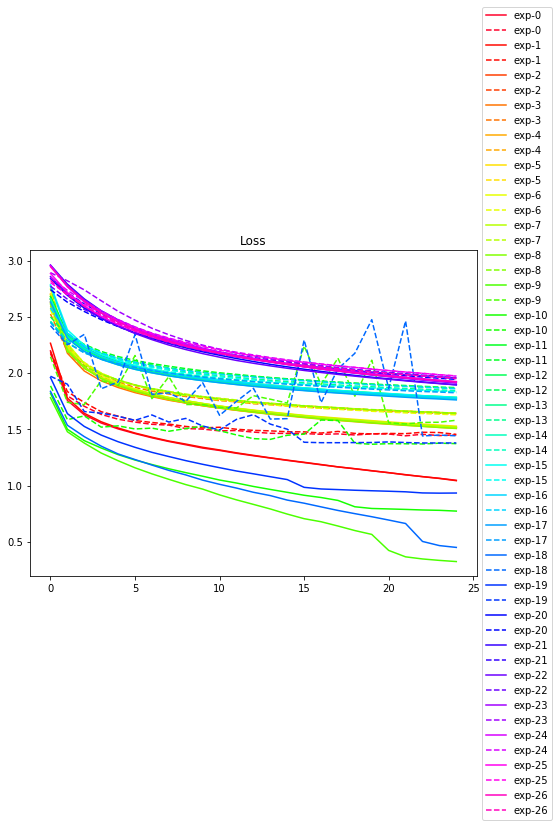

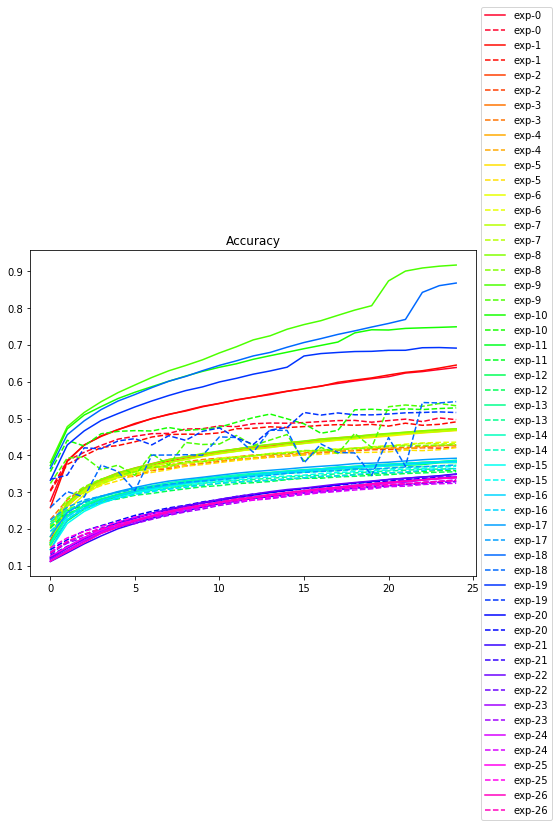

In [9]:
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()